### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 한글

import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()

matplotlib.rc('font', family=font)

In [6]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국
...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일


1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [7]:
# 1. 상위 5개 데이터 출력
print(df.head())

# 2. 결측값이 있는 열이 있는지 확인
print("\n결측값이 있는지 확인:")
print(df.isnull().sum())

df = df.dropna()  # 결측값이 있는 행 삭제

# 3. 데이터 타입 확인
print(df.dtypes)

# OrderDate 열을 datetime 형식으로 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# 변환된 결과 확인
print(df['OrderDate'].dtype)

   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  
0  2024-06-10 17:18      미국  
1  2023-11-18 18:45      독일  
2  2023-10-15 11:19      중국  
3   2024-07-19 2:19      일본  
4  2024-01-20 20:34    대한민국  

결측값이 있는지 확인:
OrderID       0
Product       0
Category      0
Quantity      0
Price         0
CustomerID    0
Birthdate     0
OrderDate     0
Country       0
dtype: int64
OrderID        int64
Product       object
Category      object
Quantity       int64
Price          int64
CustomerID     int64
Birthdate     object
OrderDate     object
Country       object
dty

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\USER\AppData\Local\Temp\ipykernel_17816\1193796460.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_revenue = df.resample('M', on='OrderDate').sum()['TotalRevenue']


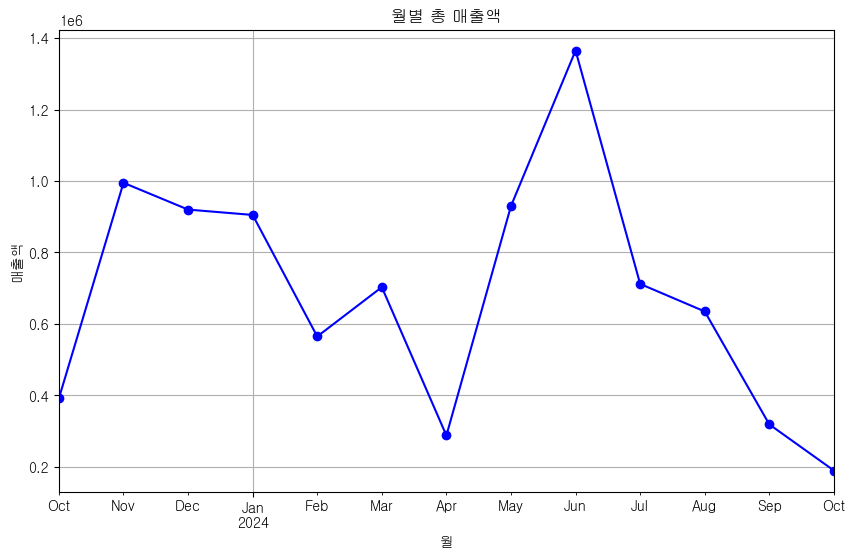

             TotalRevenue
Category                 
Food              1966000
Electronics       1746000
Beauty            1493000
         TotalRevenue
Country              
미국            2238000
독일            1973000
중국            1766000
일본            1523000
대한민국          1419000


In [8]:
# 1. 매출액 TotalRevenue 열 생성
df['TotalRevenue'] = df['Quantity'] * df['Price']

# 2. 월별 총 매출액을 집계 및 시각화
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

month_revenue = df.resample('M', on='OrderDate').sum()['TotalRevenue']

plt.figure(figsize=(10, 6))
month_revenue.plot(kind='line', color='blue', marker='o', title='월별 총 매출액', xlabel='월', ylabel='매출액')
plt.grid(True)
plt.show()

# 3. 카테고리별 매출액이 높은 상위 3개 카테고리
category_revenue = df.groupby('Category').agg({'TotalRevenue': 'sum'})                          # 'agg'를 사용하여 특정 컬럼만 집계
top_3_category = category_revenue.sort_values(by='TotalRevenue', ascending=False).head(3)

print(top_3_category)

# 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가 출력
country_revenue = df.groupby('Country').agg({'TotalRevenue': 'sum'})                            # 'agg'를 사용하여 특정 컬럼만 집계
top_3_country = country_revenue.sort_values(by='TotalRevenue', ascending=False).head(5)

print(top_3_country)

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [10]:
# 1. 고객별 총 매출액 계산 후, 상위 5명 고객 출력
customer_revenue = df.groupby('CustomerID').agg({'TotalRevenue': 'sum'})
top_5_customer = customer_revenue.sort_values(by='TotalRevenue', ascending=False).head(5)

print(top_5_customer)


# 2. 주문 횟수가 가장 많은 5명의 고객을 출력
order_count = df.groupby('CustomerID').size()
top_5_order = order_count.sort_values(ascending=False).head(5)

print(top_5_order)


# 3. 연령대에 따라 고객을 분류, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하라

# 현재 날짜 기준으로 나이 계산
current_year = pd.Timestamp.now().year
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Age'] = current_year - df['Birthdate'].dt.year

# 연령대 계산(10대, 20대, 30대, 등)
df['AgeGroup'] = (df['Age'] // 10) * 10

#연령대별로 그룹화하여 카테고리별 구매 수량 합산
grouped = df.groupby(['AgeGroup', 'Category'])['Quantity'].sum().reset_index()

# 각 연령대에서 가장 많이 구매한 카테고리 찾기
most_category = grouped.loc[grouped.groupby('AgeGroup')['Quantity'].idxmax()]

print(most_category)

            TotalRevenue
CustomerID              
1007              334000
1354              245000
1141              241000
1589              215000
1632              192000
CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
dtype: int64
    AgeGroup  Category  Quantity
4         20      Food        15
10        30      Food        30
13        40     Books        26
20        50  Clothing        23
24        60    Beauty         5


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [11]:
# 1. 가장 많이 판매된 상위 5개 상품
top_5_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_5_products)

# 2. 카테고리별로 가장 많이 판매된 상품을 찾아 출력
category_top_products = df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index()
category_top_products = category_top_products.loc[category_top_products.groupby('Category')['Quantity'].idxmax()]
print(category_top_products)

# 3. 평균 구매 수량이 가장 높은 상위 3개 상품을 출력
avg_top_product = df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)
print(avg_top_product)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64
       Category Product  Quantity
1        Beauty     립스틱        22
7         Books      소설        21
10     Clothing      셔츠        25
14  Electronics     노트북        15
23         Food      커피        20
25       Sports    요가매트        12
Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

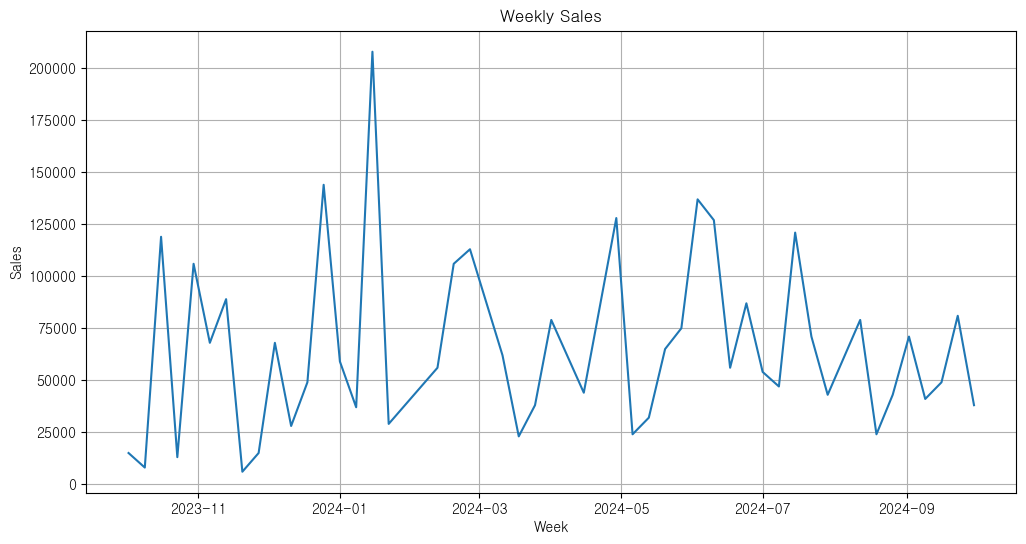

C:\Users\USER\AppData\Local\Temp\ipykernel_17816\4261912276.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['Month'] = filter_df['OrderDate'].dt.to_period('M').apply(lambda r: r.start_time)


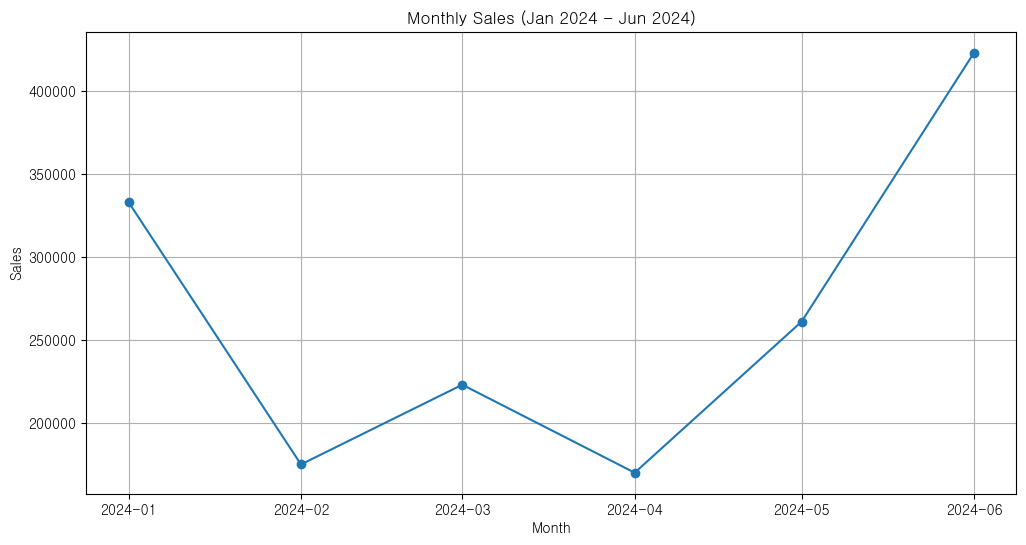

C:\Users\USER\AppData\Local\Temp\ipykernel_17816\4261912276.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Hour'] = country_df['OrderDate'].dt.hour


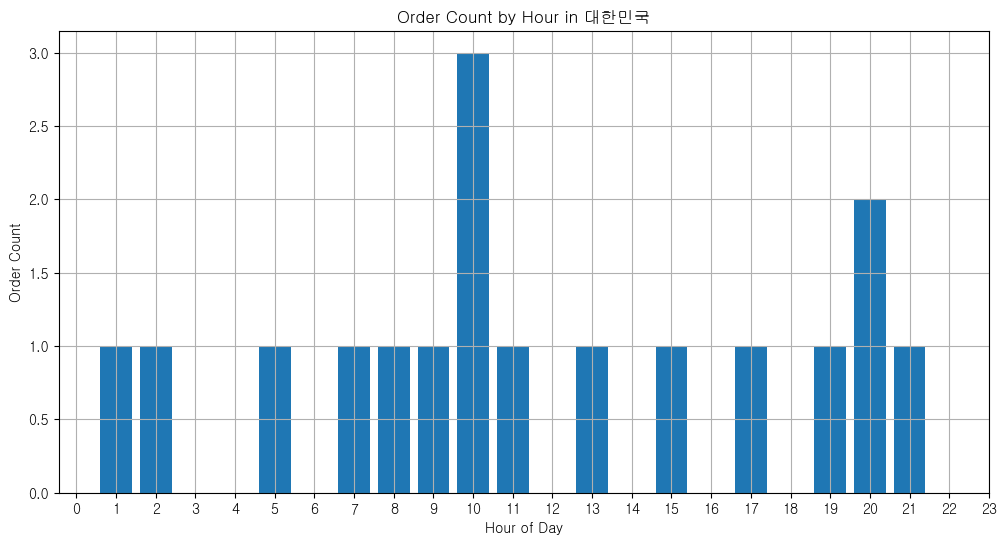

In [14]:
# 1. 주문 날짜별로 주별 매출액을 계산하고 시각화
# 날짜 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# 주별 매출액 계산
df['Week'] = df['OrderDate'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sales = df.groupby('Week')['Price'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 2. 특정 기간 동안의 매출 추이를 분석 및 시각화
# 특정 기간 필터링
start_date = '2024-01-01'
end_date = '2024-06-30'
filter_df = df[(df['OrderDate'] >= start_date) & (df['OrderDate'] <= end_date)]

# 월별 매출액 계산
filter_df['Month'] = filter_df['OrderDate'].dt.to_period('M').apply(lambda r: r.start_time)
monthly_sales = filter_df.groupby('Month')['Price'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales (Jan 2024 - Jun 2024)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트 도출
# 특정 국가 선택
country = '대한민국'
country_df = df[df['Country'] == country]

# 시간대별 주문 수 계산
country_df['Hour'] = country_df['OrderDate'].dt.hour
hour_orders = country_df.groupby('Hour').size()

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(hour_orders.index, hour_orders.values)
plt.title(f'Order Count by Hour in {country}')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [17]:
# 고객 재구매율 분석
# 고객별 주문 수
customer_order_count = df.groupby('CustomerID')['OrderID'].nunique()

# 재구매 고객 수 계산
repeated_customers = customer_order_count[customer_order_count > 1].count()

# 전체 고객 수
total_customers = customer_order_count.count()

# 재구매율 계산
reorder_rate = repeated_customers / total_customers

print(reorder_rate)


# 상품 카테고리별 할인을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석


0.08108108108108109
